In [3]:
%%% Define the Chebyshev with j=1,...5 and the (first and second -order)derivative functions of it.
function ans=T0(x)
    ans=1;
endfunction
function ans=T1(x)
    ans=x;
endfunction
function ans=T2(x)
    ans=2*x.^2-1;
endfunction
function ans=T3(x)
    ans=4 * x.^3 - 3 * x;
endfunction
function ans=T4(x)
    ans=1-8*x.^2+8*x.^4;
endfunction
function ans=T5(x)
    ans=5*x-20*x.^3+16*x.^5;
endfunction
%First-order
function ans=dT0(x)
    ans=0;
endfunction
function ans=dT1(x)
    ans=1;
endfunction
function ans=dT2(x)
    ans=4*x;
endfunction
function ans=dT3(x)
    ans=12*x.^2-3;
endfunction
function ans=dT4(x)
    ans=32*x.^3-16*x;
endfunction
function ans=dT5(x)
    ans=80*x.^4-60*x.^2+5;
endfunction
%Second-order
function ans=ddT0(x)
    ans=0;
endfunction
function ans=ddT1(x)
    ans=0;
endfunction
function ans=ddT2(x)
    ans=4;
endfunction
function ans=ddT3(x)
    ans=24*x;
endfunction
function ans=ddT4(x)
    ans=96*x.^2-16;
endfunction
function ans=ddT5(x)
    ans=320*x.^3-120*x;
endfunction

%%Define the function f(x,y)=(y,-1/4*x)
function rhs=f(t,y)
rhs=zeros(1,2);
rhs(1)=y(2);
rhs(2)=-1/4*y(1);
endfunction

 added to session magics.



In [4]:
%% RKC method with 5 stages.
function [h,t,y]=rkc5(a,b,y0,N)
%%Input   %a,b: starting, final time 
          %y0: initial value
          %N: number of time interval
%%Output  %h: stepsize
          %t: timegrid
          %y: numerical solution
    h = (b-a)/N;
    t = a:h:b;
    epsilon = 0.15;  %damping parameter
    s = 5; % number of stages
    w0 = 1+epsilon/s^2;
    w1 = dT5(w0)/ddT5(w0);
    %%Define coefficients
    b = a = mu = nu = c= mu_t = gamma_t = zeros(s+1,1);
    b(1) =  b(2) = b(3) = ddT2(w0) / (dT2(w0) ^2 );   
    b(4) = ddT3(w0) / (dT3(w0)^2);
    b(5) = ddT4(w0) / (dT4(w0)^2);
    b(6) = ddT5(w0) / (dT5(w0)^2);
    % a_j+1=1-b_{j+1}*T_j(w0)    
    a(2) = 1 - b(2) * T1(w0);
    a(3) = 1 - b(3) * T2(w0);
    a(4) = 1 - b(4) * T3(w0);
    a(5) = 1 - b(5) * T4(w0);
    a(6) = 1 - b(6) * T5(w0);

    %mu_j+1=-2b_jw_0/b_{j-1}
    for i=3:6
        mu(i) = 2 * w0 * b(i) / b(i-1);
    endfor
    %nu_j=-b_j/(b_{j-2})
    for i = 3:6
        nu(i) = -b(i) / b(i-2); 
    endfor
    %c_j=w1*b_j*T'_j(w0)
    c(1)= 0;
    c(2) = w1 * b(2) * dT1(w0);
    c(3) = w1 * b(3) * dT2(w0);
    %c(2) = c(3)/dT2(w0);
    c(4) = w1 * b(4) * dT3(w0);
    c(5) = w1 * b(5) * dT4(w0);
    c(6) = 1;
    %mu_t(i) = 2 * w1*b(i) / b(i-1)
    mu_t(2) = b(2)*w1;
    for i = 3:6
        mu_t(i) = 2 * w1 *b(i) / b(i-1);
    endfor    
    %gamma_t= -a_{j-1} *mu_t(j)
    gamma_t(2) = c(2);
    for i = 3:6
        gamma_t(i) = - a(i-1) * mu_t(i);
    endfor
    %%%% Main loop
    g = zeros(s+1,2);
    y=zeros(N+1,2);
    y(1,:) = y0;
    for i = 1:N
        g(1,:) = y(i,:);
        g(2,:) = g(1,:) + mu_t(2)*h*f(t(i)+c(1)*h,g(1,:));
        for j=3:s+1
            g(j,:) = (1-mu(j)-nu(j))*g(1,:) + mu(j)* g(j-1,:) + nu(j)*g(j-2,:) + mu_t(j)*h*f(t(i)+c(j-1),g(j-1,:)) + gamma_t(j)*h*f(t(i)+c(1)*h,g(1,:));
        endfor
        y(i+1,:) = g(s+1,:);
    endfor    
endfunction

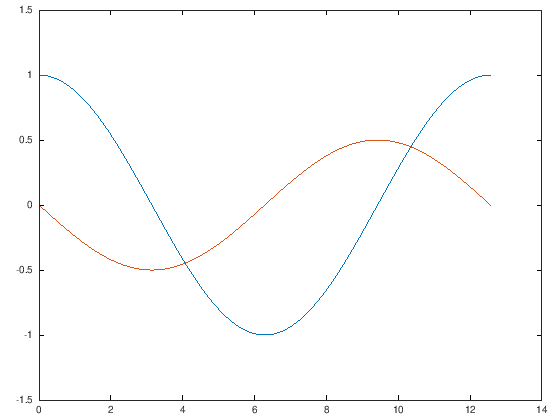

In [28]:
%%Plot the numerical solution.
[h,t,y] = rkc5(0,4*pi,[1 0],256);
plot(t,y(:,1),t,y(:,2));

In [30]:
%% Compare with exact solution
N=1024;
[h,t,y] = rkc5(0,4*pi,[1 0],N);
t_n=linspace(0,4*pi,N+1);
exact=zeros(N+1,2);
exact(:,1)=cos(t_n/2);
exact(:,2)=-1/2*sin(t_n/2);

norm (y-exact, 'inf')

ans =  0.000017356


In [7]:
%%% Using RK2 method to solve ODE.
function[h,t,y] = RK2(a,b,y0,N)
%%Input   %a,b: starting, final time 
          %y0: initial value
          %N: number of time interval
%%Output  %h: stepsize
          %t: timegrid
          %v: numerical solution

h=(b-a)/N;
t=linspace(a,b,N+1);
m=length(y0);
y=zeros(N+1,m); 
%%RK2
y(1,:)=y0;
for j=1:N
k_1=f(t(j),y(j,:));
k_2=f(t(j)+0.5*h,y(j,:)+0.5*h*k_1) ;
y(j+1,:)=y(j,:)+h*k_2;
endfor
endfunction

 added to session magics.



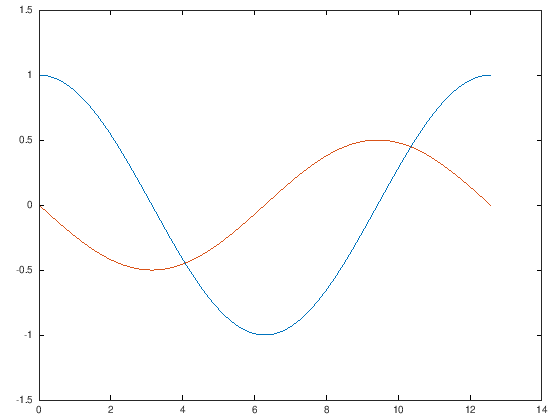

In [12]:
[h,t,y] = RK2(0,4*pi,[1 0],256);
plot(t,y(:,1)',t,y(:,2)')

In [31]:
N=2^10;
for k=1:5
[h,t,y] = rkc5(0,4*pi,[1 0],N);
t_n=linspace(0,4*pi,N+1);
exact=zeros(N+1,2);
exact(:,1)=cos(t_n/2);
exact(:,2)=-1/2*sin(t_n/2);
N=N*2;
norm (y-exact, 'inf')
end

ans =  0.000017356


ans =  0.0000043377


ans =  0.0000010843


ans =  0.00000027104


ans =  0.000000067758


In [8]:
N=2^10;
for k=1:5
[h,t,y] = RK2(0,4*pi,[1 0],N);
t_n=linspace(0,4*pi,N+1);
exact=zeros(N+1,2);
exact(:,1)=cos(t_n/2);
exact(:,2)=-1/2*sin(t_n/2);
N=N*2;
norm (y-exact, 'inf')
end

ans =  0.000037001


ans =  0.0000092462


ans =  0.0000023111


ans =  0.00000057770


ans =  0.00000014442
